# 中心极限，和总体分布无关，多次抽样后，样本的均值，服从正态分布
1. 在抽样次数相同的情况下，样本容量越大，样本均值的方差越小
1. 总体是 均匀分布，但是，样本均值依然服从正态分布

In [1]:
using Statistics
using DataFrames
using Distributions
using StatsPlots
using GraphRecipes

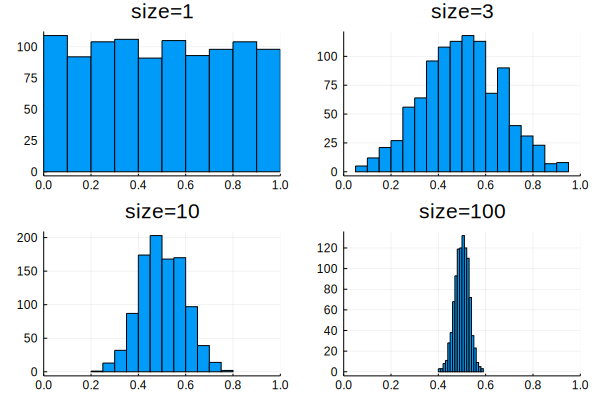

In [16]:
# 一次抽样，均匀分布，样本大小为 size，关注的参数是样本的均值
function oneRound(size=1)
    return mean(rand(size))
end    


# 样本大小有多个，方便作比较
size = [1 3 10 100]

# 每个大小的样本，都模拟 1000 次抽样，每次抽样都有一个样本均值

a1 = zeros(1000, 4)
for s in 1:4
    for i in 1:1:1000
        a1[i, s] = oneRound(size[s])
    end
end

gr()

p1 = histogram(a1[:,1], title="size=1", xticks=0:0.2:1, xlim=(0,1))
p2 = histogram(a1[:,2], title="size=3", xticks=0:0.2:1, xlim=(0,1))
p3 = histogram(a1[:,3], title="size=10", xticks=0:0.2:1, xlim=(0,1))
p4 = histogram(a1[:,4], title="size=100", xticks=0:0.2:1, xlim=(0,1))

plot(p1,p2,p3,p4,layout=(2,2),legend=false)


# 总体如果是泊松分布，样本均值依然服从正态分布

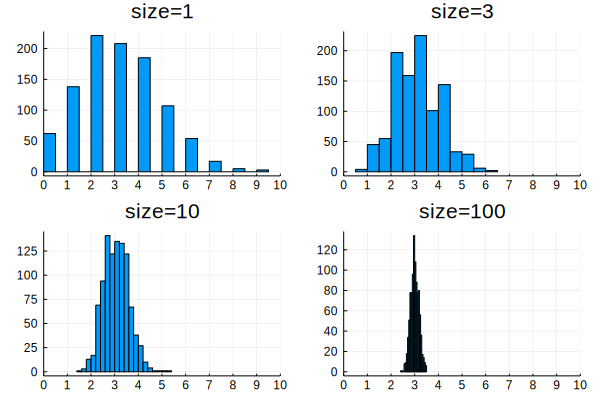

In [15]:
d = Poisson(3)

# 一次抽样，均匀分布，样本大小为 size，关注的参数是样本的均值
function oneRound(size=1)
    return mean(rand(d, size))
end    


# 样本大小有多个，方便作比较
size = [1 3 10 100]

# 每个大小的样本，都模拟 1000 次抽样，每次抽样都有一个样本均值

a1 = zeros(1000, 4)
for s in 1:4
    for i in 1:1:1000
        a1[i, s] = oneRound(size[s])
    end
end

gr()

p1 = histogram(a1[:,1], title="size=1", xticks=0:1:10, xlim=(0,10))
p2 = histogram(a1[:,2], title="size=3", xticks=0:1:10, xlim=(0,10))
p3 = histogram(a1[:,3], title="size=10", xticks=0:1:10, xlim=(0,10))
p4 = histogram(a1[:,4], title="size=100", xticks=0:1:10, xlim=(0,10))

plot(p1,p2,p3,p4,layout=(2,2),legend=false)

# 总体是二项分布，样本均值依然服从正态分布

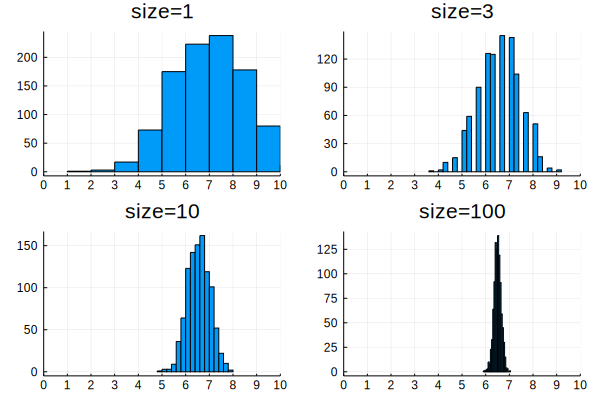

In [19]:
d = Binomial(10, 0.65)

# 一次抽样，均匀分布，样本大小为 size，关注的参数是样本的均值
function oneRound(size=1)
    return mean(rand(d, size))
end    


# 样本大小有多个，方便作比较
size = [1 3 10 100]

# 每个大小的样本，都模拟 1000 次抽样，每次抽样都有一个样本均值

a1 = zeros(1000, 4)
for s in 1:4
    for i in 1:1:1000
        a1[i, s] = oneRound(size[s])
    end
end

gr()

p1 = histogram(a1[:,1], title="size=1", xticks=0:1:10, xlim=(0,10))
p2 = histogram(a1[:,2], title="size=3", xticks=0:1:10, xlim=(0,10))
p3 = histogram(a1[:,3], title="size=10", xticks=0:1:10, xlim=(0,10))
p4 = histogram(a1[:,4], title="size=100", xticks=0:1:10, xlim=(0,10))

plot(p1,p2,p3,p4,layout=(2,2),legend=false)

# 指数分布

Actual mean: 4.5
Mean of means: 4.498531861323131
Actual variance: 20.25
Mean of variances: 20.205588089177414


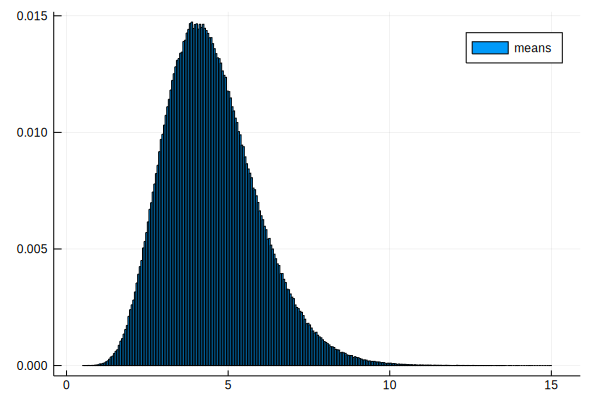

In [19]:
lambda = 1/4.5
expDist = Exponential(1/lambda)

# 每次抽样只有10个数（样本容量），但是模拟 10w 次这样的抽样
n,N = 10,10^6

means = zeros(N) 
variances = zeros(N) 

for i in 1:N
  data = rand(expDist,n)
  means[i] = mean(data)
  variances[i] = var(data)
end


println("Actual mean: ",mean(expDist),"\nMean of means: ",mean(means))
println("Actual variance: ",var(expDist),"\nMean of variances: ",mean(variances))

gr()
histogram(means, label="means", normalize = :probability)
# histogram!(variances, label="var")


In [20]:
?round

search: round rounding RoundUp RoundDown RoundToZero RoundingMode RoundNearest



```
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]])
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; digits=, base=10)
round(z::Complex[, RoundingModeReal, [RoundingModeImaginary]]; sigdigits=, base=10)
```

Return the nearest integral value of the same type as the complex-valued `z` to `z`, breaking ties using the specified [`RoundingMode`](@ref)s. The first [`RoundingMode`](@ref) is used for rounding the real components while the second is used for rounding the imaginary components.

# Example

```jldoctest
julia> round(3.14 + 4.5im)
3.0 + 4.0im
```

---

```
round([T,] x, [r::RoundingMode])
round(x, [r::RoundingMode]; digits::Integer=0, base = 10)
round(x, [r::RoundingMode]; sigdigits::Integer, base = 10)
```

Rounds the number `x`.

Without keyword arguments, `x` is rounded to an integer value, returning a value of type `T`, or of the same type of `x` if no `T` is provided. An [`InexactError`](@ref) will be thrown if the value is not representable by `T`, similar to [`convert`](@ref).

If the `digits` keyword argument is provided, it rounds to the specified number of digits after the decimal place (or before if negative), in base `base`.

If the `sigdigits` keyword argument is provided, it rounds to the specified number of significant digits, in base `base`.

The [`RoundingMode`](@ref) `r` controls the direction of the rounding; the default is [`RoundNearest`](@ref), which rounds to the nearest integer, with ties (fractional values of 0.5) being rounded to the nearest even integer. Note that `round` may give incorrect results if the global rounding mode is changed (see [`rounding`](@ref)).

# Examples

```jldoctest
julia> round(1.7)
2.0

julia> round(Int, 1.7)
2

julia> round(1.5)
2.0

julia> round(2.5)
2.0

julia> round(pi; digits=2)
3.14

julia> round(pi; digits=3, base=2)
3.125

julia> round(123.456; sigdigits=2)
120.0

julia> round(357.913; sigdigits=4, base=2)
352.0
```

!!! note
    Rounding to specified digits in bases other than 2 can be inexact when operating on binary floating point numbers. For example, the [`Float64`](@ref) value represented by `1.15` is actually *less* than 1.15, yet will be rounded to 1.2.

    # Examples

    ```jldoctest; setup = :(using Printf)
    julia> x = 1.15
    1.15

    julia> @sprintf "%.20f" x
    "1.14999999999999991118"

    julia> x < 115//100
    true

    julia> round(x, digits=1)
    1.2
    ```


# Extensions

To extend `round` to new numeric types, it is typically sufficient to define `Base.round(x::NewType, r::RoundingMode)`.

---

```
round(dt::TimeType, p::Period, [r::RoundingMode]) -> TimeType
```

Return the `Date` or `DateTime` nearest to `dt` at resolution `p`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 9:30 to the nearest hour) will be rounded up.

For convenience, `p` may be a type instead of a value: `round(dt, Dates.Hour)` is a shortcut for `round(dt, Dates.Hour(1))`.

```jldoctest
julia> round(Date(1985, 8, 16), Dates.Month)
1985-08-01

julia> round(DateTime(2013, 2, 13, 0, 31, 20), Dates.Minute(15))
2013-02-13T00:30:00

julia> round(DateTime(2016, 8, 6, 12, 0, 0), Dates.Day)
2016-08-07T00:00:00
```

Valid rounding modes for `round(::TimeType, ::Period, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

---

```
round(x::Period, precision::T, [r::RoundingMode]) where T <: Union{TimePeriod, Week, Day} -> T
```

Round `x` to the nearest multiple of `precision`. If `x` and `precision` are different subtypes of `Period`, the return value will have the same type as `precision`. By default (`RoundNearestTiesUp`), ties (e.g., rounding 90 minutes to the nearest hour) will be rounded up.

For convenience, `precision` may be a type instead of a value: `round(x, Dates.Hour)` is a shortcut for `round(x, Dates.Hour(1))`.

```jldoctest
julia> round(Dates.Day(16), Dates.Week)
2 weeks

julia> round(Dates.Minute(44), Dates.Minute(15))
45 minutes

julia> round(Dates.Hour(36), Dates.Day)
2 days
```

Valid rounding modes for `round(::Period, ::T, ::RoundingMode)` are `RoundNearestTiesUp` (default), `RoundDown` (`floor`), and `RoundUp` (`ceil`).

Rounding to a `precision` of `Month`s or `Year`s is not supported, as these `Period`s are of inconsistent length.
